## Importing Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import tensorflow as tf
from tensorflow import keras

## Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 104s 1us/step


In [4]:
print(f"Length of X_train : {len(X_train)}")
print(f"Length of X_test : {len(X_test)}")
print(f"Length of y_train : {len(y_train)}")
print(f"Length of y_test : {len(y_test)}")

Length of X_train : 50000
Length of X_test : 10000
Length of y_train : 50000
Length of y_test : 10000


Shape of X_train (50000, 32, 32, 3)
Shape of y_train (50000, 1)
Shape of X_test (10000, 32, 32, 3)
Shape of y_test (10000, 1)
-------------------------------------------
Shape of X_train[0] (32, 32, 3)
Shape of y_train[0] (1,)
y_train value [6]


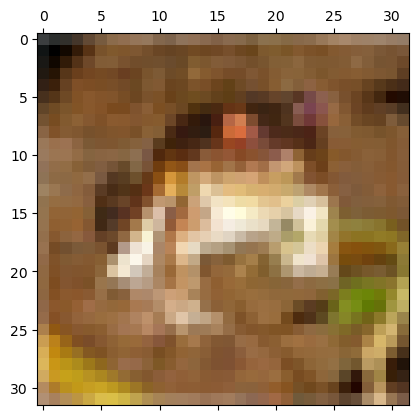

In [5]:
print(f"Shape of X_train {X_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of X_test {X_test.shape}")
print(f"Shape of y_test {y_test.shape}")
print('-------------------------------------------')
print(f"Shape of X_train[0] {X_train[0].shape}")
print(f"Shape of y_train[0] {y_train[0].shape}")

print(f"y_train value {y_train[0]}")
#print(f"X_train value {X_train[0]}")

## matshow visualizes a 2D matrix or array as color-coded image.
plt.matshow(X_train[0])
plt.show()

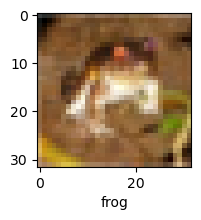

In [17]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[int(y[index])])
    
plot_sample(X_train,y_train,0)

In [16]:
#classes[y_train[0]]   returns an error as it is 
classes[int(y_train[0])]

'frog'

#### List of labels / categories in y 

In [6]:
np.unique(np.array(y_train))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

#### Count of unique labels in a dataset

In [7]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}


## Pre-processing

#### Scaling the grayscale values in range(0,1)
- Since the values are in range of 0 to 255, to convert them in range(0,1) the values are divided by 255

In [18]:
X_train = X_train / 255
X_test = X_test / 255

#### CNN Model Building

In [31]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation,Conv2D,MaxPooling2D


cnn = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)
cnn.evaluate(X_test,y_test)

y_pred = cnn.predict(X_test)
print(y_pred.shape)

y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
#cm


C:\Users\hornt\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.3245 - loss: 1.8187
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5168 - loss: 1.3507
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5681 - loss: 1.2156
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5944 - loss: 1.1531
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6125 - loss: 1.0939
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6347 - loss: 1.0386
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6437 - loss: 1.0108
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6524 - loss: 0.9923
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6664 - loss: 0.9548
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6722 - loss: 0.9344
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6981 - loss: 0.8753
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3m

#### Plot confusion Matrix

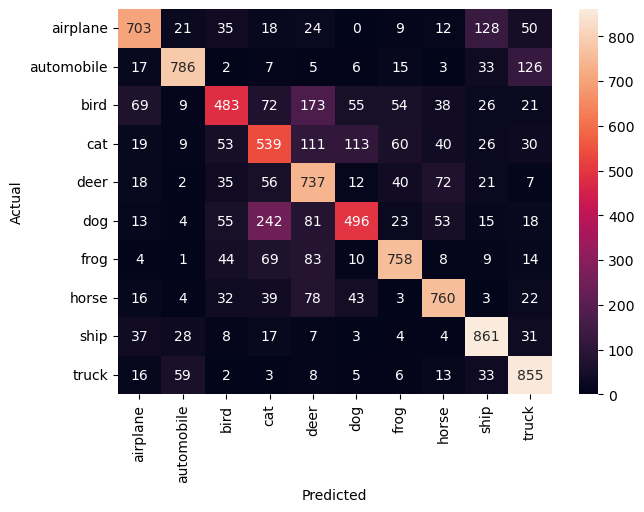

In [32]:
fig, ax =plt.subplots(figsize = (7,5))
sns.heatmap(cm, annot=True, fmt='d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(classes,rotation =90)
ax.set_yticklabels(classes,rotation =0)
plt.show()

#### Print Classification Report

In [33]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred_labels))

              precision    recall  f1-score   support

           0       0.77      0.70      0.74      1000
           1       0.85      0.79      0.82      1000
           2       0.64      0.48      0.55      1000
           3       0.51      0.54      0.52      1000
           4       0.56      0.74      0.64      1000
           5       0.67      0.50      0.57      1000
           6       0.78      0.76      0.77      1000
           7       0.76      0.76      0.76      1000
           8       0.75      0.86      0.80      1000
           9       0.73      0.85      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



#### Model Architecture Summary

In [34]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 502,688 (1.92 MB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 335,126 (1.28 MB)

#### Verifying Predictions

In [54]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print([y_test[i][0] for i in range(len(y_test))])

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6, 6, 6, 3, 2, 6, 1, 8, 2, 1, 6, 8, 6, 8, 0, 4, 0, 7, 7, 5, 5, 3, 5, 2, 3, 4, 1, 7, 5, 4, 6, 1, 9, 3, 

In [55]:
print(y_pred_labels)

[3, 8, 8, 8, 6, 6, 1, 2, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 4, 4, 4, 0, 9, 6, 6, 5, 4, 3, 9, 9, 4, 9, 9, 5, 0, 6, 5, 6, 0, 9, 3, 9, 7, 2, 9, 8, 7, 3, 8, 8, 7, 3, 5, 2, 7, 5, 4, 9, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 9, 2, 7, 3, 5, 8, 8, 1, 1, 7, 2, 7, 4, 8, 9, 9, 0, 2, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 8, 6, 3, 7, 4, 0, 2, 2, 9, 7, 0, 4, 6, 5, 8, 2, 1, 2, 8, 2, 8, 3, 3, 8, 4, 1, 8, 9, 1, 5, 9, 7, 2, 8, 3, 5, 6, 5, 8, 7, 6, 5, 5, 3, 8, 9, 6, 0, 0, 5, 2, 9, 3, 4, 2, 1, 6, 6, 8, 7, 8, 4, 9, 0, 9, 9, 9, 8, 9, 9, 8, 7, 5, 9, 0, 5, 2, 4, 6, 8, 6, 2, 3, 8, 6, 8, 4, 1, 7, 4, 8, 8, 5, 8, 3, 9, 8, 7, 1, 3, 8, 5, 7, 9, 7, 9, 5, 9, 8, 0, 0, 9, 0, 4, 7, 6, 9, 4, 4, 9, 4, 4, 3, 3, 5, 9, 5, 8, 8, 0, 4, 9, 3, 3, 1, 9, 8, 9, 0, 8, 1, 8, 2, 0, 5, 5, 9, 9, 2, 0, 3, 0, 8, 9, 8, 1, 3, 3, 8, 8, 3, 4, 7, 0, 2, 3, 6, 3, 8, 2, 0, 9, 7, 5, 9, 0, 6, 1, 9, 9, 1, 8, 7, 9, 1, 2, 6, 1, 3, 2, 6, 0, 0, 6, 6, 6, 3, 2, 2, 8, 9, 2, 9, 4, 8, 6, 0, 0, 3, 0, 7, 7, 5, 5, 3, 3, 6, 4, 5, 1, 7, 3, 4, 6, 9, 9, 6, 

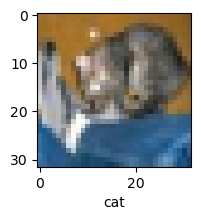

In [57]:
plot_sample(X_test,y_test,0)

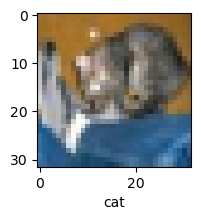

In [59]:
plot_sample(X_test,y_pred_labels,0)